# PZ-6.2_Community

## Изучение алгоритмов выделения сообществ на основе спектральных методов и оптимизации меры модулярности

### В библиотеке IGraph реализованы следующие алгоритмы выделения сообществ :

- community_fastgreedy()
- community_optimal_modularity() 
- community_leading_eigenvector()
- community_leading_eigenvector_naive()
- community_multilevel() 

Задача - создать тестовые графы,  применить к ним указанные алгоритмы библиотеки IGraph, визуализировать результаты и оценить качество выделения сообществ.

## Задание ПЗ-6.2

1.Создать тестовый граф (рис.1 см.ниже). Такой граф естественным образом распадается по крайней мере на четыре непересекающихся сообщества. Граф образован путём объединения двумя ребрами двух связных компонент. Первая связная компонента представляет собой "ветряную мельницу", состоящую из трёх клик по 4 узла каждая, объединённых одним общим узлом. Вторая связная копонента представляет собой кольцо клик по 5 узлов каждая.

Граф в формате IGraph может быть создан средствами самой библиотеки IGraph с "нуля" либо получен путём преобразования графовой структуры другого пакета (например, с помощью функции Graph.from_networkx).

Если тестовый граф создаётся путём "ручного" соединения рёбрами двух типовых графов, следует обратить внимание на необходимость переименования вершин этих графов таким образом, что каждая вершина в объединённом графе имела уникальную метку.

2.Средствами библиотеки IGraph создать функцию цветной визуализации сообществ графа (функция выдаёт на печать общую информацию по анализируемому графу, списки вершин выделяемых сообществ, оценку качества выделения и цветной рисунок графа).

3.Применить указанные выше функции для выделения сообществ в тестовом графе (рис.1), измерить время работы каждого алгоритмы и представить визуализацию результатов.

4.Создать тестовый граф (рис.2 см.ниже). Граф образован путём объединения двумя ребрами двух связных компонент. Первая связная компонента представляет собой "ветряную мельницу", состоящую из трёх клик по 20 узлов каждая, объединённых одним общим узлом. Вторая связная копонента представляет собой кольцо трёх клик по 20 узлов каждая.

5.Повторить п.3 для тестового графа (рис.2). 

Результаты работы сохранить в файле PZ-6.2(N)11.11.20.ipynb , где N- порядковый номер по журналу. Файл должен содержать комментарии, поясняющие действия и их результаты.

In [42]:
from networkx.generators.community import windmill_graph
from networkx.generators.community import ring_of_cliques
from matplotlib import pyplot as plt
import networkx as nx
import random as r
import igraph as ig
import time

In [48]:
def plot_graph(G, draw_type=None, weight_name=None, node_color='#1f78b4'):
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        if draw_type == "circular":
            nx.draw_circular(G, node_color=node_color)
        elif draw_type == "random":
            nx.draw_random(G, node_color=node_color)
        elif draw_type == "spectral":
            nx.draw_spectral(G, node_color=node_color)
        elif draw_type == "spring":
            nx.draw_spring(G, node_color=node_color)
        else:
            nx.draw(G, with_labels=True, node_color=node_color)
    plt.show()
    
def get_color(count):
    return [(r.random(), r.random(), r.random(),) for _ in range(count)]

def benchmark(func):    
    def wrapper(*args, **kwargs):
        start = time.time()
        return_value = func(*args, **kwargs)
        end = time.time()
        print(f'Время выполнения: {end-start} секунд.')
        return return_value
    return wrapper

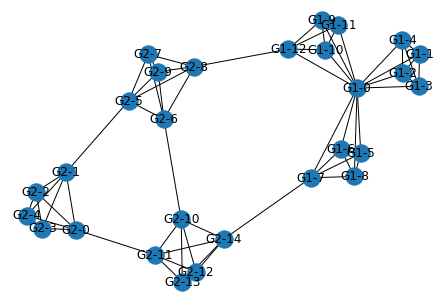

In [49]:
G1 = windmill_graph(3, 5)
G2 = ring_of_cliques(3, 5)
T = nx.union(G1, G2, ("G1-", "G2-"))
T.add_edge("G1-12", "G2-8")
T.add_edge("G1-7", "G2-14")

plot_graph(T)

G = ig.Graph.from_networkx(T)

In [50]:
@benchmark
def draw_graph(G, split_func):
    clusters = split_func(G)
    colour_map = get_color(len(clusters))
    print(f"Nodes count: {G.vcount()}")
    print(f"Edges count: {G.ecount()}")

    return ig.plot(G, vertex_color = [colour_map[color] for color in clusters.membership])

draw_graph(G, ig.Graph.community_leading_eigenvector)

Nodes count: 28
Edges count: 65
Время выполнения: 0.001966714859008789 секунд.


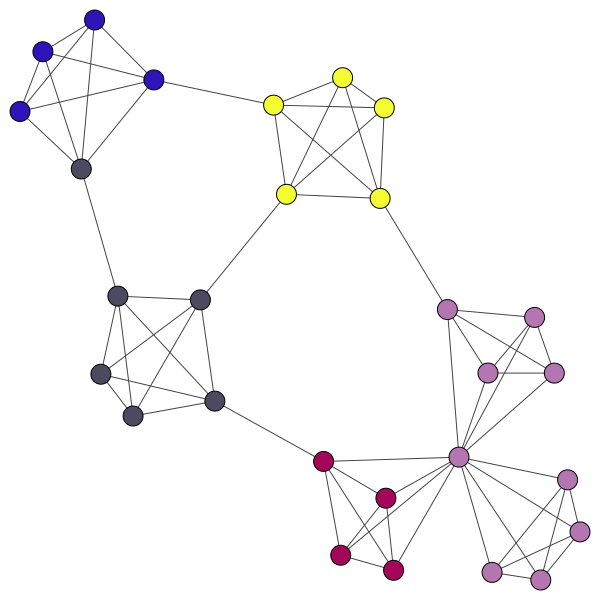

In [51]:
draw_graph(G, ig.Graph.community_leading_eigenvector)

#Рис.1: test_graph_6.1
#<img src="test_graph_6.1.png" width=600>

Nodes count: 28
Edges count: 65
Время выполнения: 0.0009989738464355469 секунд.


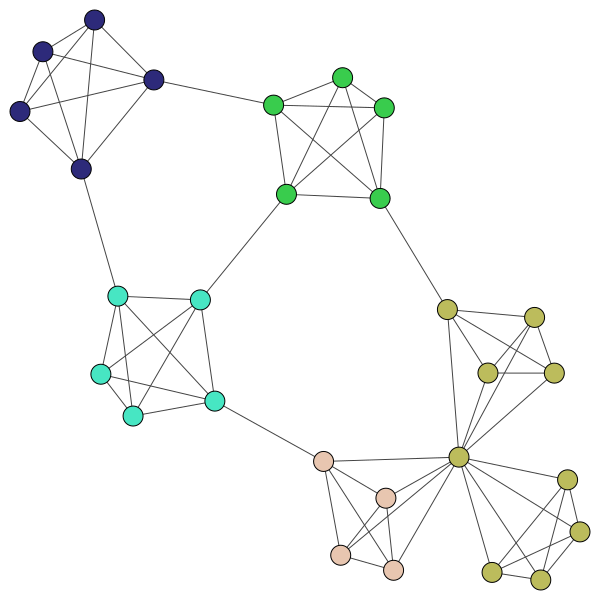

In [52]:
draw_graph(G, ig.Graph.community_multilevel)

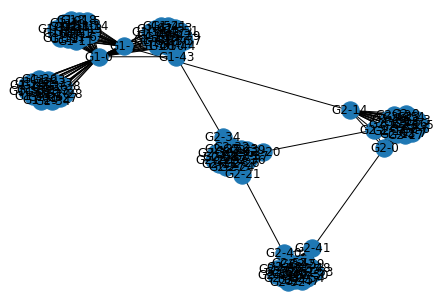

In [53]:
G1 = windmill_graph(3, 20)
G2 = ring_of_cliques(3, 20)
T = nx.union(G1, G2, ("G1-", "G2-"))
T.add_edge("G1-43", "G2-34")
T.add_edge("G1-7", "G2-14")

plot_graph(T)

G = ig.Graph.from_networkx(T)

Nodes count: 118
Edges count: 1145
Время выполнения: 0.003023386001586914 секунд.


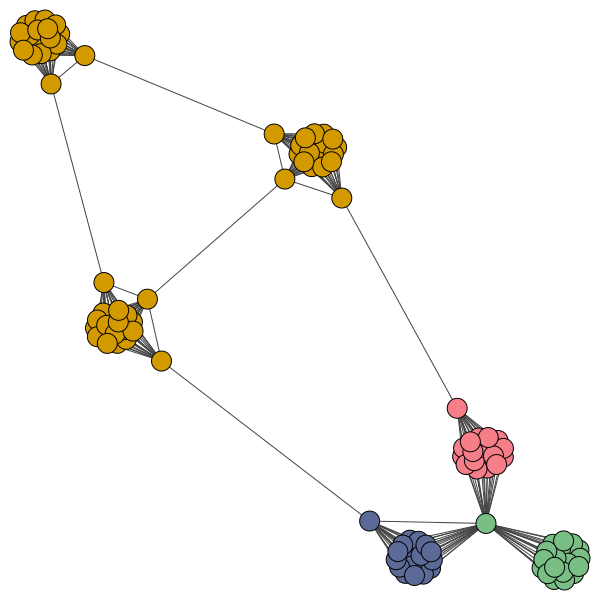

In [55]:
draw_graph(G, ig.Graph.community_leading_eigenvector)

Nodes count: 118
Edges count: 1145
Время выполнения: 0.0010280609130859375 секунд.


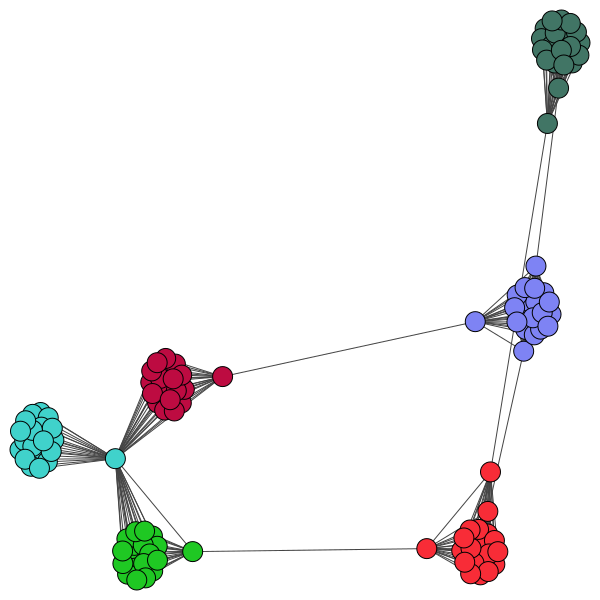

In [56]:
draw_graph(G, ig.Graph.community_multilevel)

Рис.2: test_graph_6.2
<img src="test_graph_6.2.png" width=600>